# Exploratory Data Analysis of Global Economic Indicators (2010–2023)

This project analyzes global economic indicators from 2010 to 2023 using Python and visualization tools. The dataset includes various metrics like GDP, inflation, employment, and more, which are crucial for assessing economic health and trends.

Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data while Handling Error

In [ ]:
def load_file():
    try:
        df = pd.read_csv("economic_indicators_dataset_2010_2023.csv")
        print(" File loaded successfully!")
        return df
    except FileNotFoundError:
        print("File not found. Make sure it is in the current directory.")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

df = load_file()

 File loaded successfully!


Getting information about datasets

In [ ]:
print(df.head())
print(df.info())

         Date Country  Inflation Rate (%)  GDP Growth Rate (%)  \
0  2010-01-31  Brazil                1.23                 0.69   
1  2010-01-31  France                6.76                 2.59   
2  2010-01-31     USA                7.46                 4.84   
3  2010-02-28  Brazil                5.43                 0.31   
4  2010-02-28  Canada                0.69                -0.52   

   Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  
0                  10.48               7.71           21748.85  
1                   4.27               7.39           10039.56  
2                   2.64               6.39           13129.10  
3                   8.26               6.09           23304.58  
4                  11.92              -0.51           16413.03  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   

 Checking for missing values and Duplicate rows

In [ ]:

missing_values_in_rows = df.isnull().sum(axis=1)
missing_values = missing_values_in_rows[missing_values_in_rows > 0]
print("Missing Values in Each Row:", missing_values)

duplicate_count = df.duplicated().sum()
print("Duplicate Rows:", duplicate_count)

Missing Values in Each Row: Series([], dtype: int64)
Duplicate Rows: 0


Findings:

-There are total 200 rows with 5 columns (4 intype and 1 object type column)

-There is no duplicates and null values in the datasets.

Converting 'Date' column to datetime and checking their consistency

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
print("Date converted to datetime. Sample Years:\n", df['Year'].head())

if df['Date'].isna().any():
    print("Date column format is inconsistent.")
else:
    print("Date column has consistent formats.")


Date converted to datetime. Sample Years:
 0    2010
1    2010
2    2010
3    2010
4    2010
Name: Year, dtype: int32
Date column has consistent formats.


In [ ]:
print("\nUnique Values in Object Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")



Unique Values in Object Columns:
Country: ['Brazil' 'France' 'USA' 'Canada' 'Japan' 'Germany' 'China' 'UK' 'India'
 'Australia']


In [ ]:
print("\nValue Ranges:")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")



Value Ranges:
Inflation Rate (%): min = 0.0, max = 9.99
GDP Growth Rate (%): min = -5.0, max = 9.93
Unemployment Rate (%): min = 2.0, max = 11.97
Interest Rate (%): min = -0.98, max = 10.0
Stock Index Value: min = 1017.27, max = 39982.21
Year: min = 2010, max = 2023


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.strip('_,(%)')
print("\nStandardized Column Names:\n", df.columns.tolist())



Standardized Column Names:
 ['Date', 'Country', 'Inflation_Rate', 'GDP_Growth_Rate', 'Unemployment_Rate', 'Interest_Rate', 'Stock_Index_Value', 'Year']


In [ ]:
column_to_keep = ['Date', 'Country', 'Inflation_Rate', 'GDP_Growth_Rate', 'Unemployment_Rate', 'Interest_Rate']
df = df[column_to_keep]
print("\nColumns Retained for Analysis:", column_to_keep)



Columns Retained for Analysis: ['Date', 'Country', 'Inflation_Rate', 'GDP_Growth_Rate', 'Unemployment_Rate', 'Interest_Rate']


In [ ]:
df = df.sort_values(by=['Date', 'Country']).drop_duplicates(subset=['Date', 'Country'], keep='first')
print("\nData after Removing Duplicates:\n", df.head())



Data after Removing Duplicates:
         Date Country  Inflation_Rate  GDP_Growth_Rate  Unemployment_Rate  \
0 2010-01-31  Brazil            1.23             0.69              10.48   
1 2010-01-31  France            6.76             2.59               4.27   
2 2010-01-31     USA            7.46             4.84               2.64   
3 2010-02-28  Brazil            5.43             0.31               8.26   
4 2010-02-28  Canada            0.69            -0.52              11.92   

   Interest_Rate  
0           7.71  
1           7.39  
2           6.39  
3           6.09  
4          -0.51  


Handeling Negative values

In [ ]:
df['Inflation_Rate'] = df['Inflation_Rate'].clip(lower=0)
df['GDP_Growth_Rate'] = df['GDP_Growth_Rate'].clip(lower=0)
df['Unemployment_Rate'] = df['Unemployment_Rate'].clip(lower=0)
df['Interest_Rate'] = df['Interest_Rate'].clip(lower=0)


In [ ]:
results = {}
for column in column_to_keep[2:]:
    results[column] = {
        'Standard Deviation': df[column].std(),
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Variance': df[column].var(),
        'Minimum': df[column].min(),
        'Maximum': df[column].max()
    }

for column, stats in results.items():
    print(f"\nStatistics for {column}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.4f}")



Statistics for Inflation_Rate:
Standard Deviation: 2.9969
Mean: 5.1006
Median: 5.2400
Variance: 8.9812
Minimum: 0.0000
Maximum: 9.9900

Statistics for GDP_Growth_Rate:
Standard Deviation: 3.1215
Mean: 3.2117
Median: 2.8650
Variance: 9.7437
Minimum: 0.0000
Maximum: 9.9300

Statistics for Unemployment_Rate:
Standard Deviation: 2.9874
Mean: 6.9493
Median: 6.8800
Variance: 8.9246
Minimum: 2.0000
Maximum: 11.9700

Statistics for Interest_Rate:
Standard Deviation: 3.0463
Mean: 4.6519
Median: 4.8350
Variance: 9.2797
Minimum: 0.0000
Maximum: 10.0000


In [ ]:
correlation_matrix = df[column_to_keep[2:]].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
                    Inflation_Rate  GDP_Growth_Rate  Unemployment_Rate  \
Inflation_Rate           1.000000        -0.036105           0.038146   
GDP_Growth_Rate         -0.036105         1.000000           0.044435   
Unemployment_Rate        0.038146         0.044435           1.000000   
Interest_Rate           -0.010712         0.044722           0.018392   

                   Interest_Rate  
Inflation_Rate         -0.010712  
GDP_Growth_Rate         0.044722  
Unemployment_Rate       0.018392  
Interest_Rate           1.000000  


In [ ]:
df['Year'] = df['Date'].dt.year

performance_metrics = df.groupby(['Year', 'Country']).agg({
    'Inflation_Rate': 'mean',
    'GDP_Growth_Rate': 'mean',
    'Unemployment_Rate': 'mean',
    'Interest_Rate': 'mean'
}).reset_index()

# Rename columns
performance_metrics.rename(columns={
    'Inflation_Rate': 'Average Inflation Rate',
    'GDP_Growth_Rate': 'Average GDP Growth Rate',
    'Unemployment_Rate': 'Average Unemployment Rate',
    'Interest_Rate': 'Average Interest Rate'
}, inplace=True)

print("\nColumns in performance_metrics:", performance_metrics.columns)



Columns in performance_metrics: Index(['Year', 'Country', 'Average Inflation Rate', 'Average GDP Growth Rate',
       'Average Unemployment Rate', 'Average Interest Rate'],
      dtype='object')


## Line Graphs of Economic Indicators (2019–2023) by Country

This section uses **line graphs** to visualize the yearly trends of four key economic indicators:
- Average Inflation Rate
- Average GDP Growth Rate
- Average Unemployment Rate
- Average Interest Rate

For each country, a separate line chart shows how these indicators changed from **2019 to 2023**, helping identify economic trends, stability, or volatility over time.


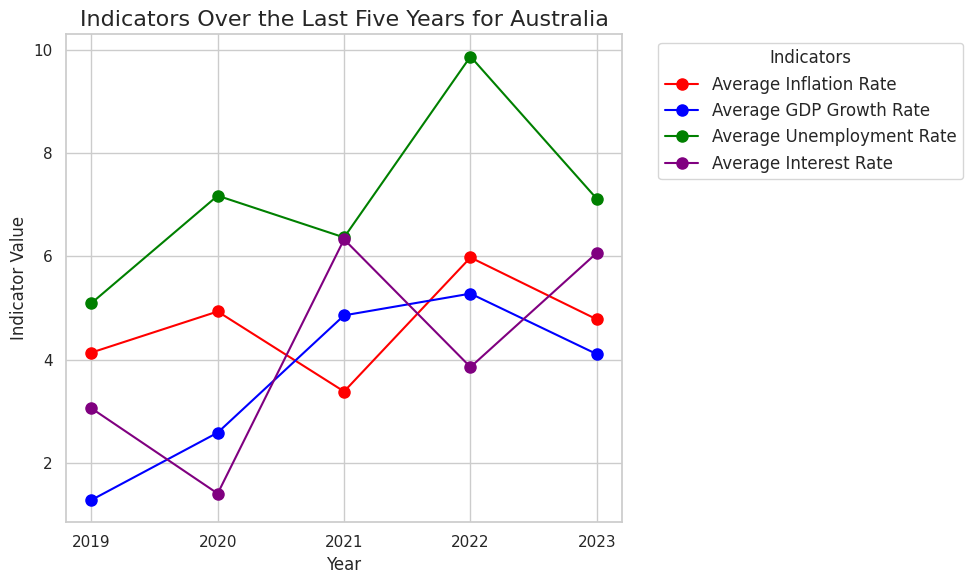

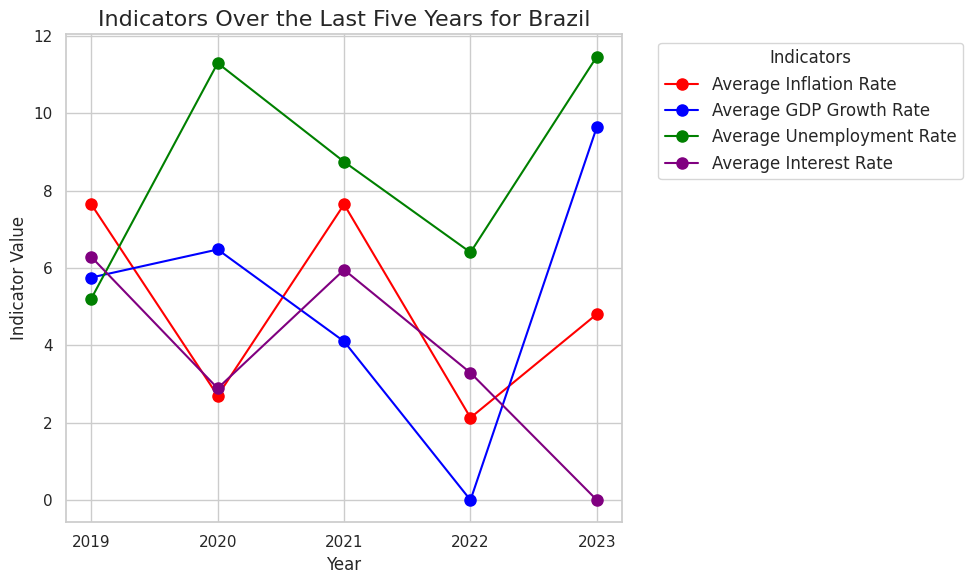

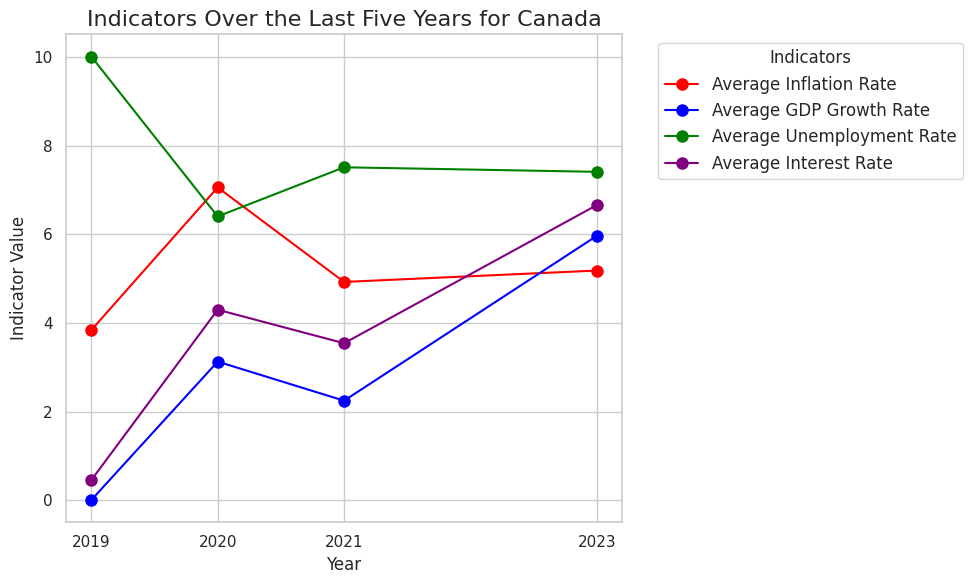

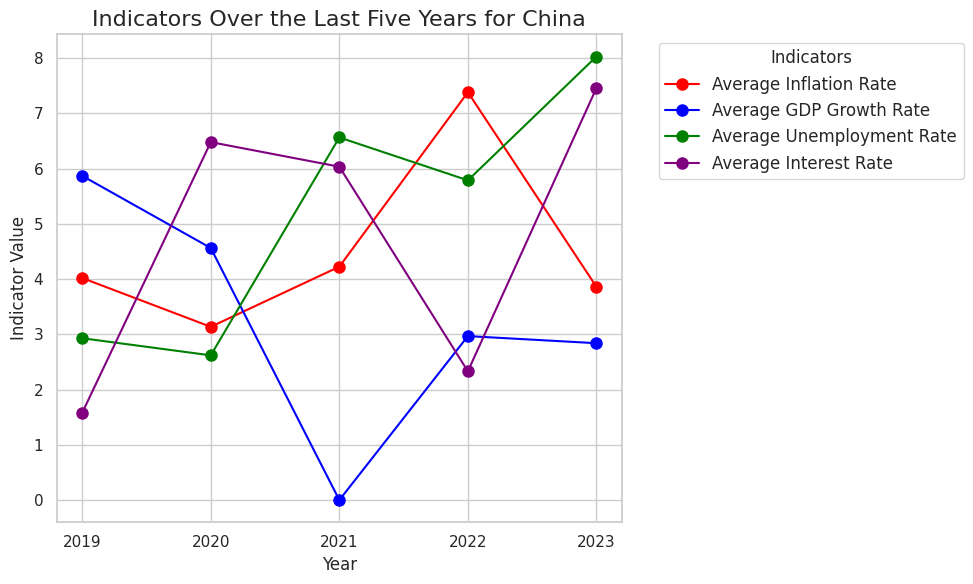

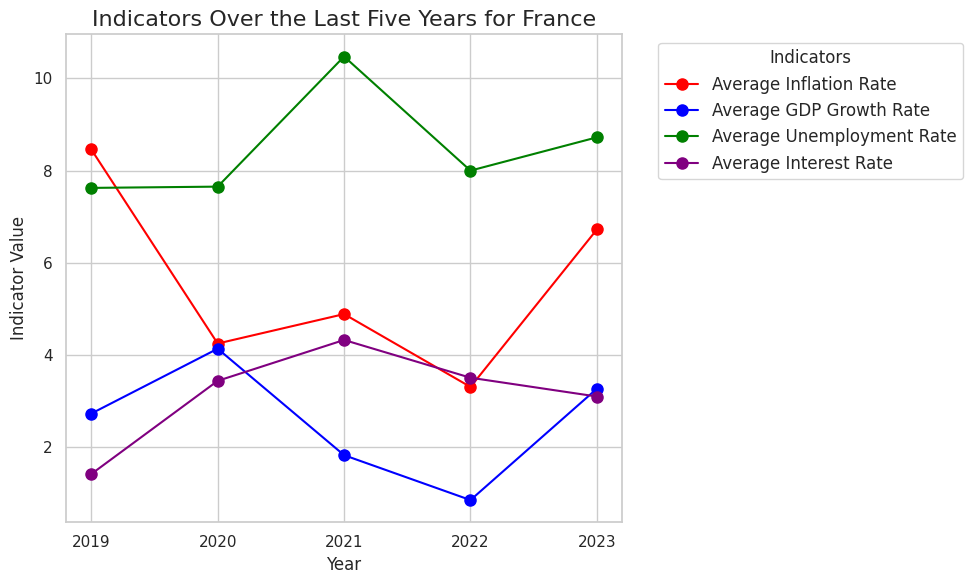

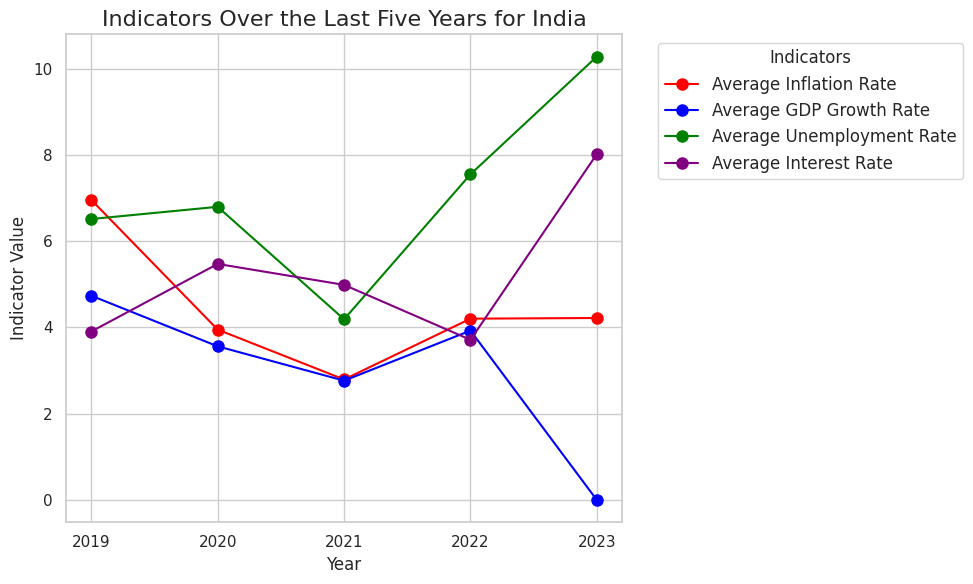

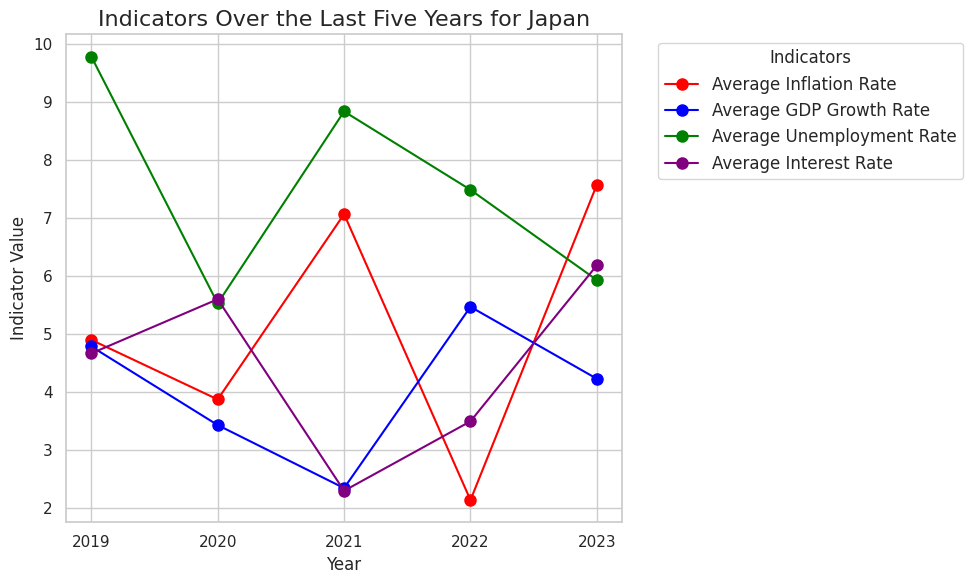

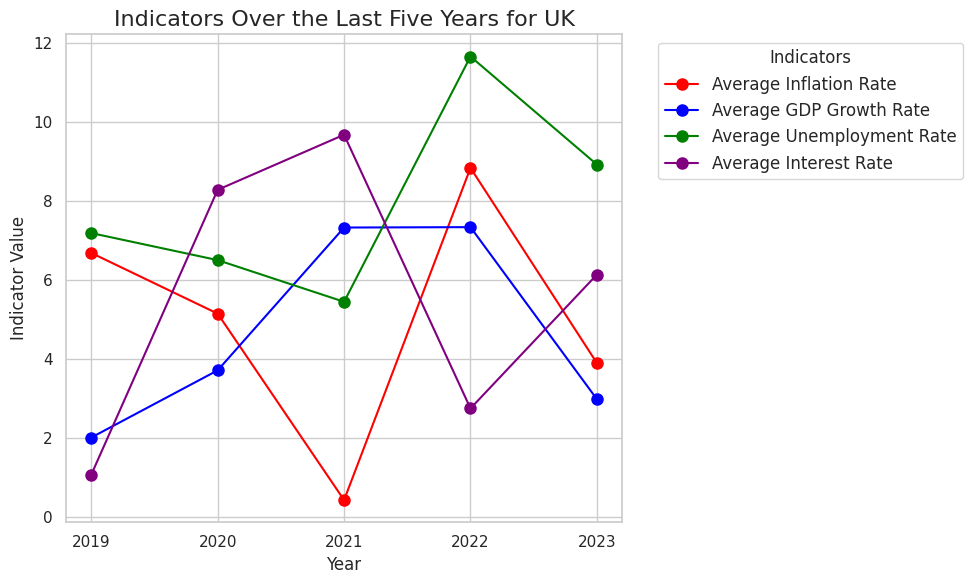

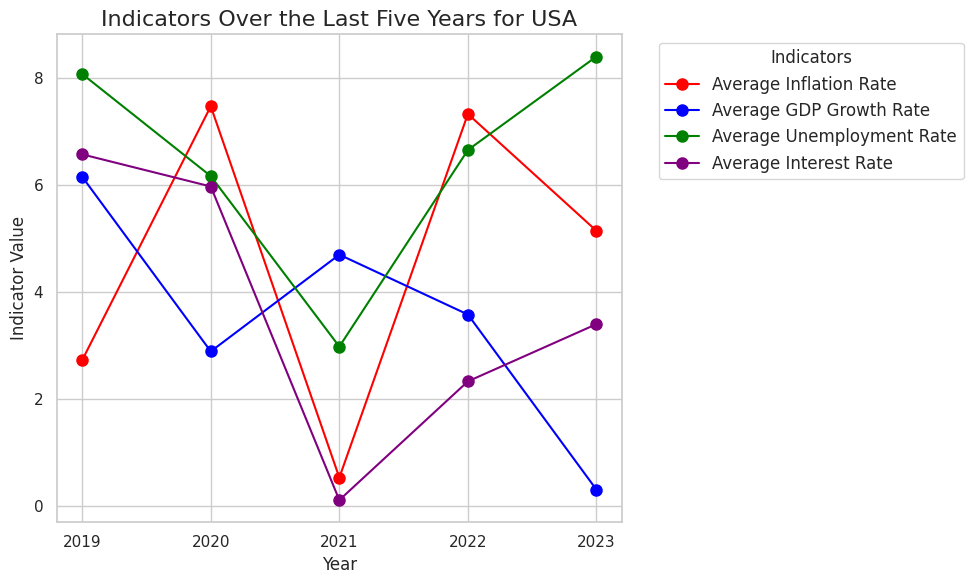

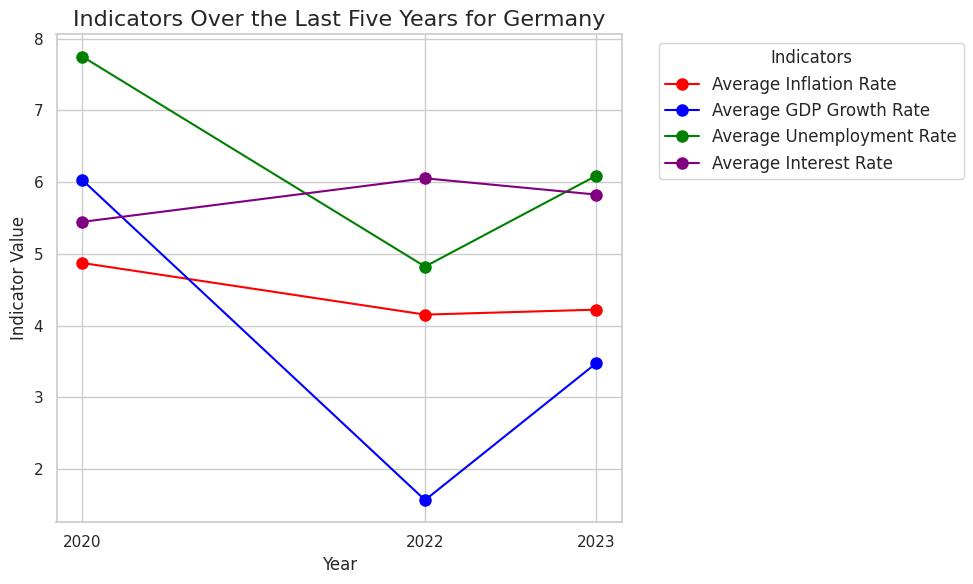

In [ ]:
sns.set(style="whitegrid")

last_five_years = performance_metrics[performance_metrics['Year'] >= 2019]

for country in last_five_years['Country'].unique():
    country_data = last_five_years[last_five_years['Country'] == country]

    plt.figure(figsize=(10, 6))
    plt.title(f"Indicators Over the Last Five Years for {country}", fontsize=16)

    for indicator, color in zip(
        ['Average Inflation Rate', 'Average GDP Growth Rate',
         'Average Unemployment Rate', 'Average Interest Rate'],
        ['red', 'blue', 'green', 'purple']):

        plt.plot(country_data['Year'], country_data[indicator],
                 marker='o', label=indicator, color=color, linestyle='-', markersize=8)

    plt.xlabel('Year')
    plt.ylabel('Indicator Value')
    plt.xticks(country_data['Year'])
    plt.legend(title='Indicators', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Correlation Heatmap of Economic Indicators

The heatmap below shows the **correlation coefficients** between various economic indicators in the dataset.

- Values range from **-1 to +1**:
  - +1 indicates a perfect positive correlation.
  - -1indicates a perfect negative correlation.
  - 0 means no correlation.
  
This visualization helps identify relationships between indicators — for example, whether high GDP growth is associated with lower unemployment, or how inflation correlates with interest rates.



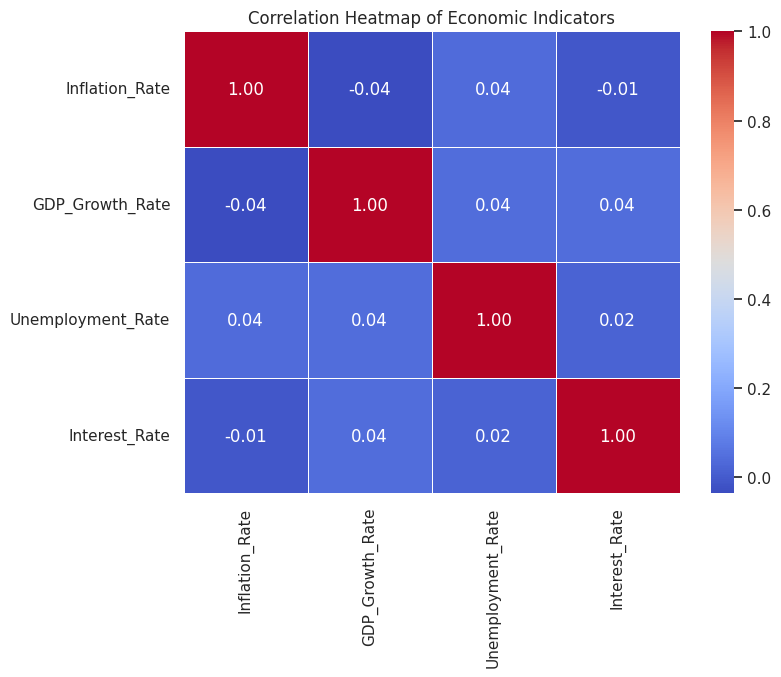

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()


In [ ]:
performance_metrics.to_csv('performance_metrics.csv', index=False)
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned Dataset Saved to 'cleaned_dataset.csv'")



Cleaned Dataset Saved to 'cleaned_dataset.csv'


## Bar Chart: Yearly Average GDP Growth Rate by Country (2010–2023)

This bar chart visualizes the **Average GDP Growth Rate** for each country from **2010 to 2023**, grouped by year.

- Each bar represents a country's GDP growth for a specific year.
- Different colors are used to distinguish the years using a bright color palette.
- This visualization makes it easy to compare economic growth **across countries** and **over time**, helping to identify patterns of growth, stagnation, or decline.

Rotate the x-axis labels to improve readability when comparing across multiple countries.


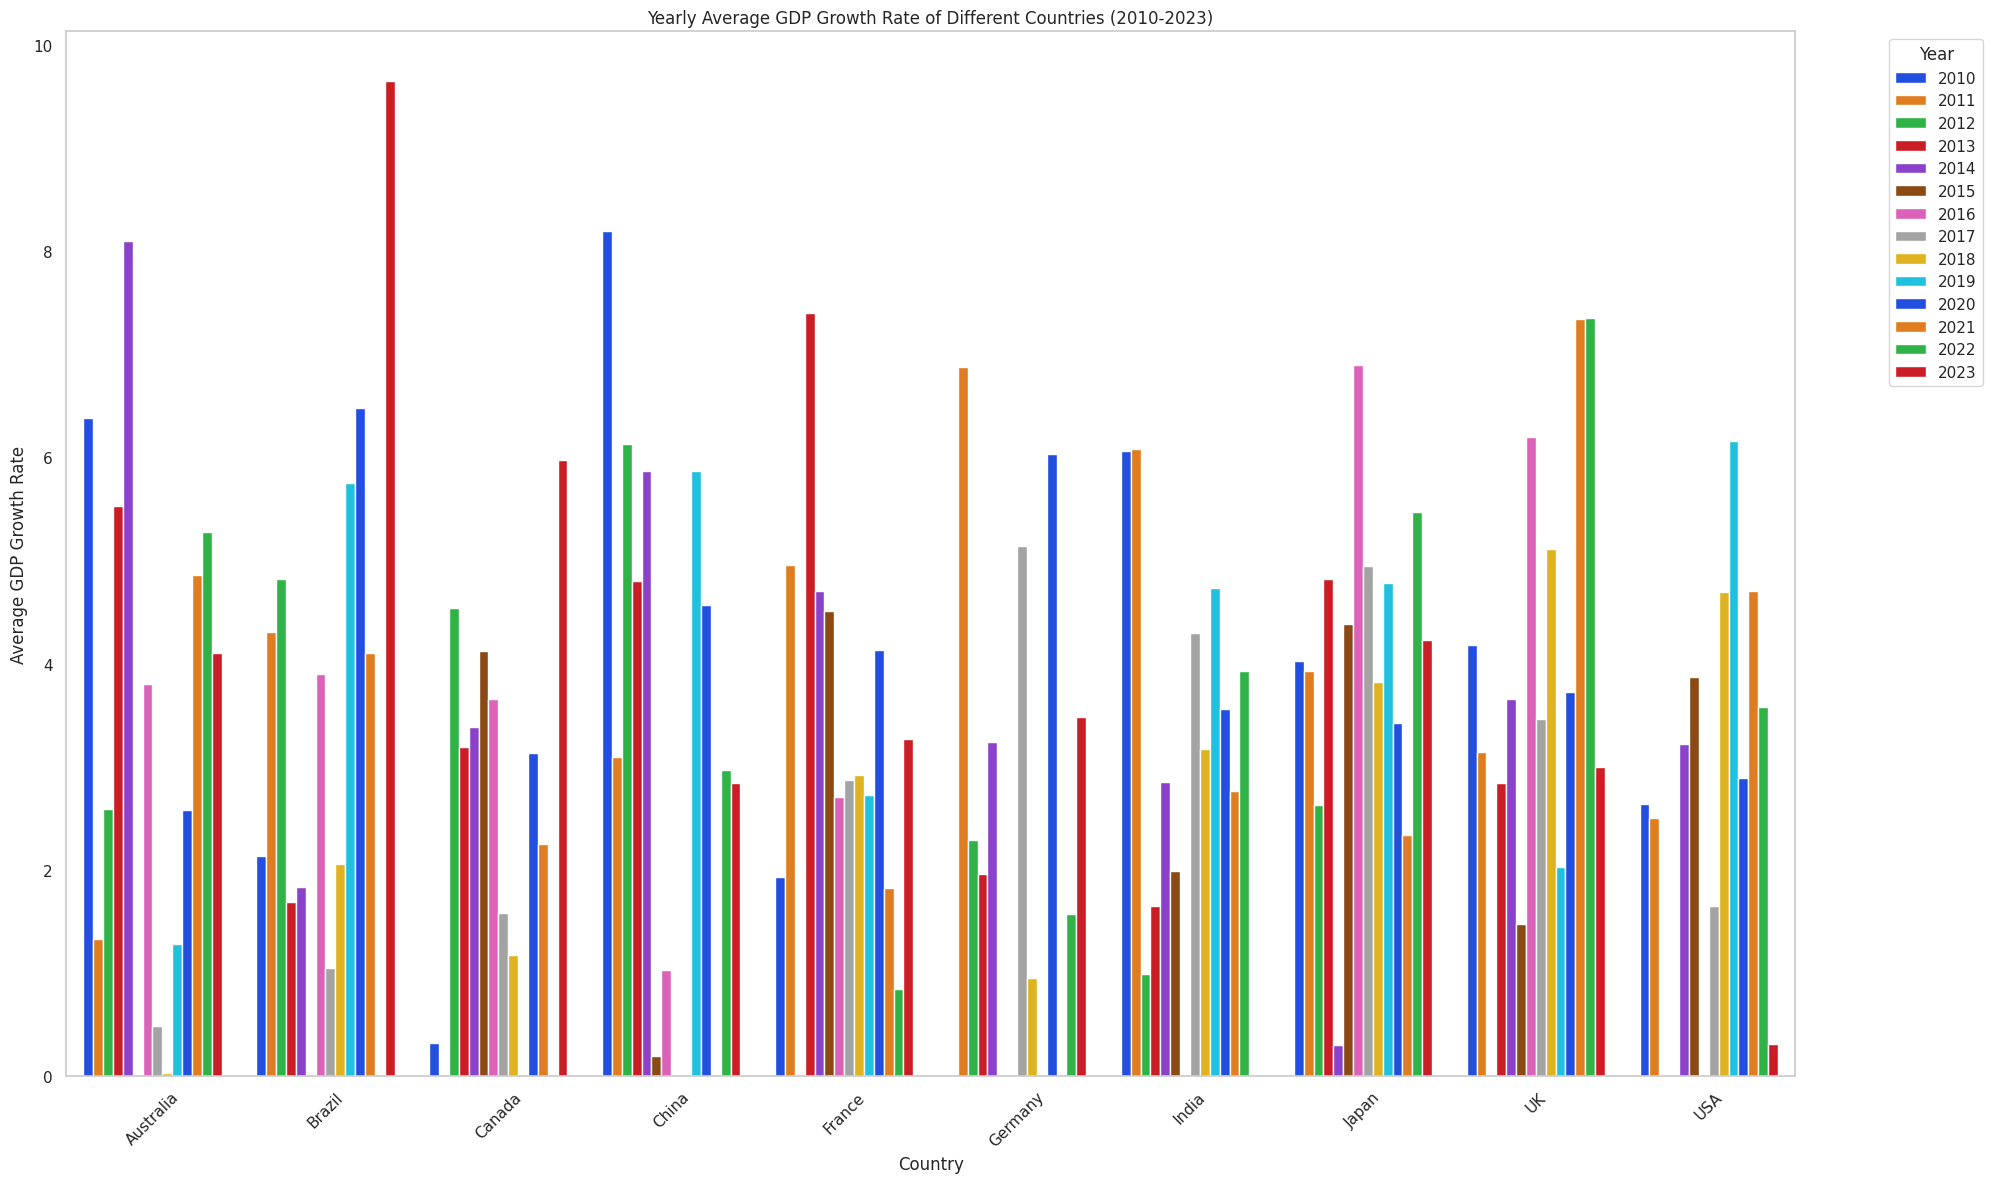

In [ ]:
performance_metrics = pd.read_csv('performance_metrics.csv')

plt.figure(figsize=(20, 12))
custom_palette = sns.color_palette("bright", n_colors=len(performance_metrics['Year'].unique()))
sns.barplot(data=performance_metrics, x='Country', y='Average GDP Growth Rate', hue='Year', palette=custom_palette)

plt.title('Yearly Average GDP Growth Rate of Different Countries (2010-2023)')
plt.xlabel('Country')
plt.ylabel('Average GDP Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
